In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/mcdonalds.csv")
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [2]:
print(data.shape)

(1453, 15)


In [3]:
print(data.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [4]:
MD_x = data.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
column_means = MD_x.mean().round(2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


np.random.seed(42)
feature_names = [
    "yummy", "convenient", "spicy", "fattening", "greasy",
    "fast", "cheap", "tasty", "expensive",
    "healthy", "disgusting"
]
MD_x = pd.DataFrame(np.random.rand(100, 11), columns=feature_names)



scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)


pca = PCA()
pca.fit(MD_x_scaled)

std_devs = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)

def print_pca_summary(std_devs, prop_var, cum_var, per_line=5):
    n = len(std_devs)
    pc_labels = [f"PC{i+1}" for i in range(n)]

    print("Importance of components:")

    for start in range(0, n, per_line):
        end = min(start + per_line, n)
        pcs = pc_labels[start:end]
        pcs_header = " ".join([f"{pc:<7}" for pc in pcs])

        print(f"{'':<25}{pcs_header}")
        print(f"{'Standard deviation':<25}" + " ".join([f"{std_devs[i]:.5f}" for i in range(start, end)]))
        print(f"{'Proportion of Variance':<25}" + " ".join([f"{prop_var[i]:.5f}" for i in range(start, end)]))
        print(f"{'Cumulative Proportion':<25}" + " ".join([f"{cum_var[i]:.5f}" for i in range(start, end)]))
        print()



print_pca_summary(std_devs, prop_var, cum_var)



Importance of components:
                         PC1     PC2     PC3     PC4     PC5    
Standard deviation       1.29434 1.13801 1.10774 1.06450 1.03391
Proportion of Variance   0.15078 0.11656 0.11044 0.10198 0.09621
Cumulative Proportion    0.15078 0.26733 0.37777 0.47976 0.57596

                         PC6     PC7     PC8     PC9     PC10   
Standard deviation       1.00494 0.94725 0.91481 0.89076 0.77459
Proportion of Variance   0.09089 0.08075 0.07532 0.07141 0.05400
Cumulative Proportion    0.66685 0.74761 0.82293 0.89434 0.94834

                         PC11   
Standard deviation       0.75764
Proportion of Variance   0.05166
Cumulative Proportion    1.00000



In [6]:
std_devs = np.sqrt(pca.explained_variance_)
std_devs_rounded = np.round(std_devs, 1)


print("Standard deviations (1, .., p=11):")
print("[", " ".join(map(str, std_devs_rounded)), "]")


rotation_matrix = pca.components_.T


rotation_df = pd.DataFrame(rotation_matrix, index=feature_names, columns=[f"PC{i+1}" for i in range(rotation_matrix.shape[1])])


rotation_df = rotation_df.round(3)


print("\nRotation (n x k) = (11 x 11):")
print(rotation_df.iloc[:, :7].to_string())
print(rotation_df.iloc[:, 7:].to_string())

Standard deviations (1, .., p=11):
[ 1.3 1.1 1.1 1.1 1.0 1.0 0.9 0.9 0.9 0.8 0.8 ]

Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7
yummy       0.422  0.059  0.295 -0.341  0.064 -0.056  0.524
convenient  0.142  0.396 -0.331  0.472 -0.358  0.244 -0.058
spicy       0.161 -0.050 -0.057  0.466  0.712 -0.117 -0.081
fattening  -0.174  0.338  0.250 -0.054  0.091  0.711  0.001
greasy     -0.403  0.344 -0.278 -0.151  0.117  0.011  0.488
fast        0.069  0.486  0.417  0.322  0.071 -0.308  0.270
cheap       0.358  0.433  0.148 -0.186 -0.235 -0.242 -0.445
tasty      -0.388 -0.165  0.309  0.019 -0.331 -0.221  0.002
expensive  -0.397  0.237  0.292 -0.209  0.343 -0.043 -0.437
healthy    -0.184 -0.216  0.441  0.484 -0.219  0.052  0.114
disgusting -0.328  0.226 -0.300  0.032 -0.057 -0.461  0.044
              PC8    PC9   PC10   PC11
yummy       0.233  0.134  0.434 -0.269
convenient -0.142  0.113  0.474 -0.204
spicy       0.086  0.306 -0.113 -0.331
fattening 

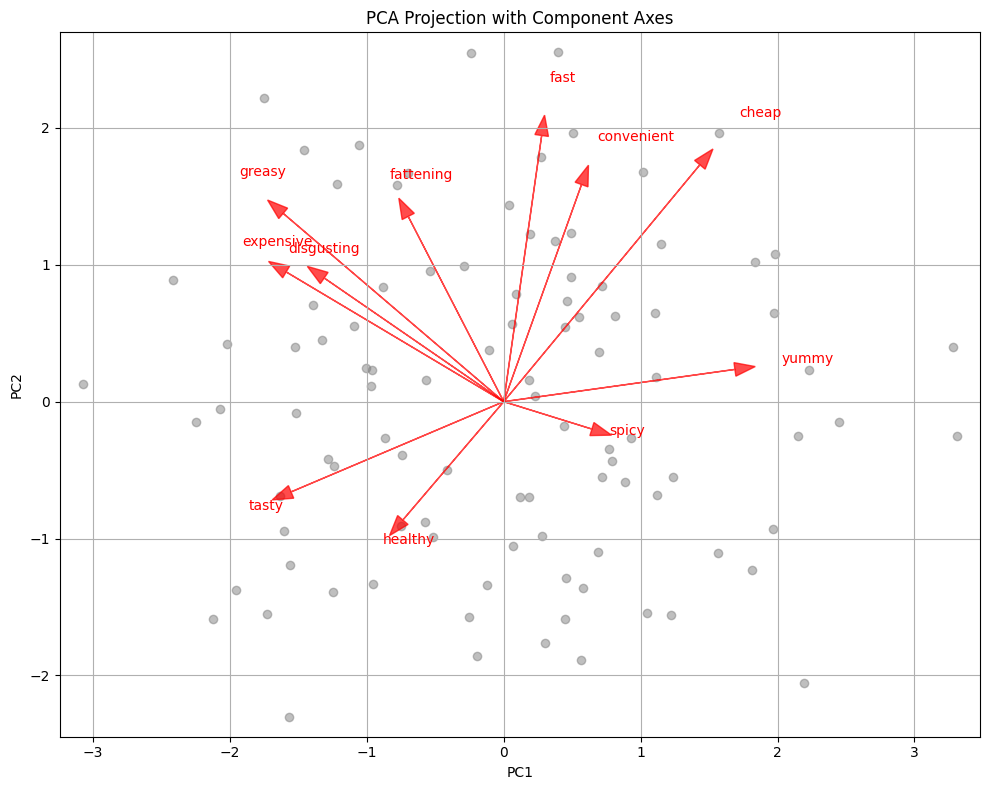

In [7]:


scores = pca.transform(MD_x_scaled)
components = pca.components_.T
feature_names = MD_x.columns

plt.figure(figsize=(10, 8))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5, c='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Component Axes")


for i, v in enumerate(components[:, :2]):
    plt.arrow(0, 0, v[0]*4, v[1]*4, color='red', alpha=0.7, head_width=0.1)
    plt.text(v[0]*4.8, v[1]*4.8, feature_names[i], color='red', fontsize=10)

plt.grid()
plt.axis('equal')
plt.tight_layout()
plt.show()


Using K-means Clustering for extracting segments

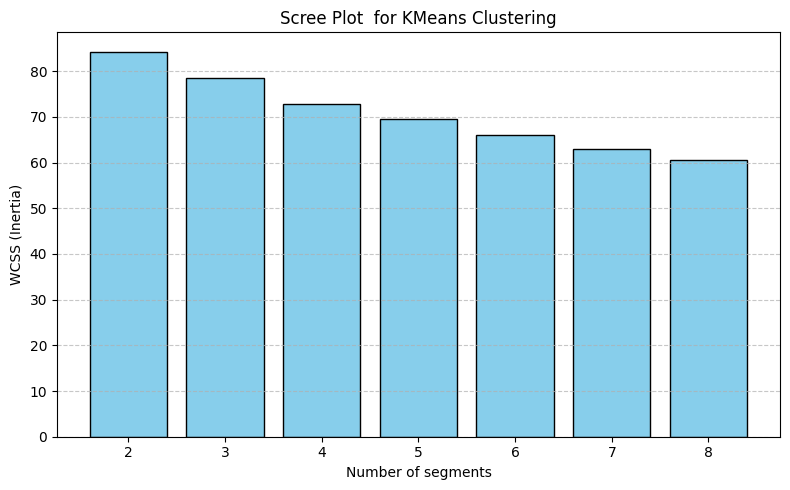

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


wcss = []
K = range(2, 9)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.bar(K, wcss, color='skyblue', edgecolor='black')
plt.xlabel('Number of segments')
plt.ylabel('WCSS (Inertia)')
plt.title('Scree Plot  for KMeans Clustering')
plt.xticks(K)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-18-5f3d97ea2582>:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=K, patch_artist=True,


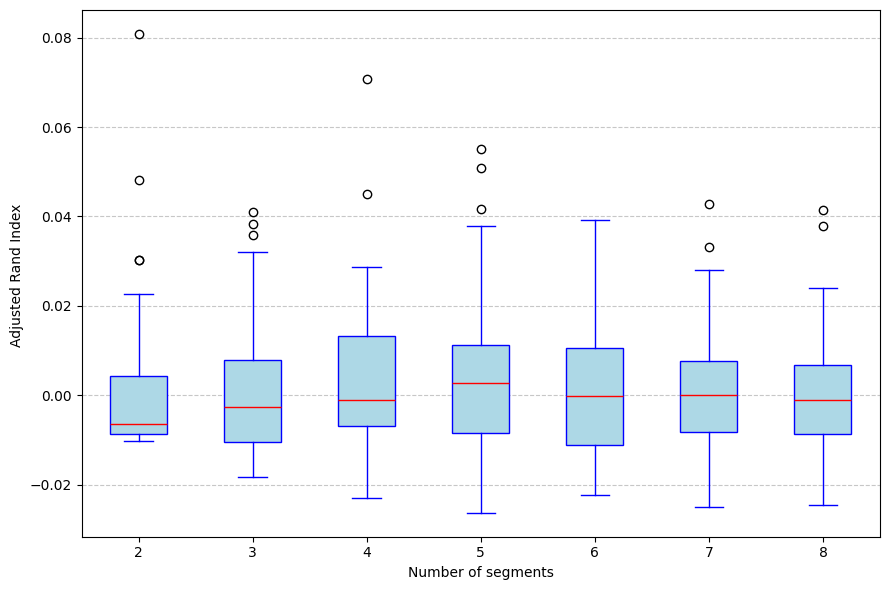

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample



K = range(2, 9)
n_rep = 10
n_boot = 100

np.random.seed(1234)


ari_dict = {k: [] for k in K}

for k in K:
    for _ in range(n_boot):

        X_resampled = resample(MD_x, replace=True, random_state=None)


        kmeans_orig = KMeans(n_clusters=k, n_init=n_rep, random_state=1234).fit(MD_x)
        kmeans_boot = KMeans(n_clusters=k, n_init=n_rep, random_state=1234).fit(X_resampled)


        if len(kmeans_orig.labels_) == len(kmeans_boot.labels_):
            ari = adjusted_rand_score(kmeans_orig.labels_, kmeans_boot.labels_)
            ari_dict[k].append(ari)


data_to_plot = [ari_dict[k] for k in K]


plt.figure(figsize=(9, 6))
plt.boxplot(data_to_plot, labels=K, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index ")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


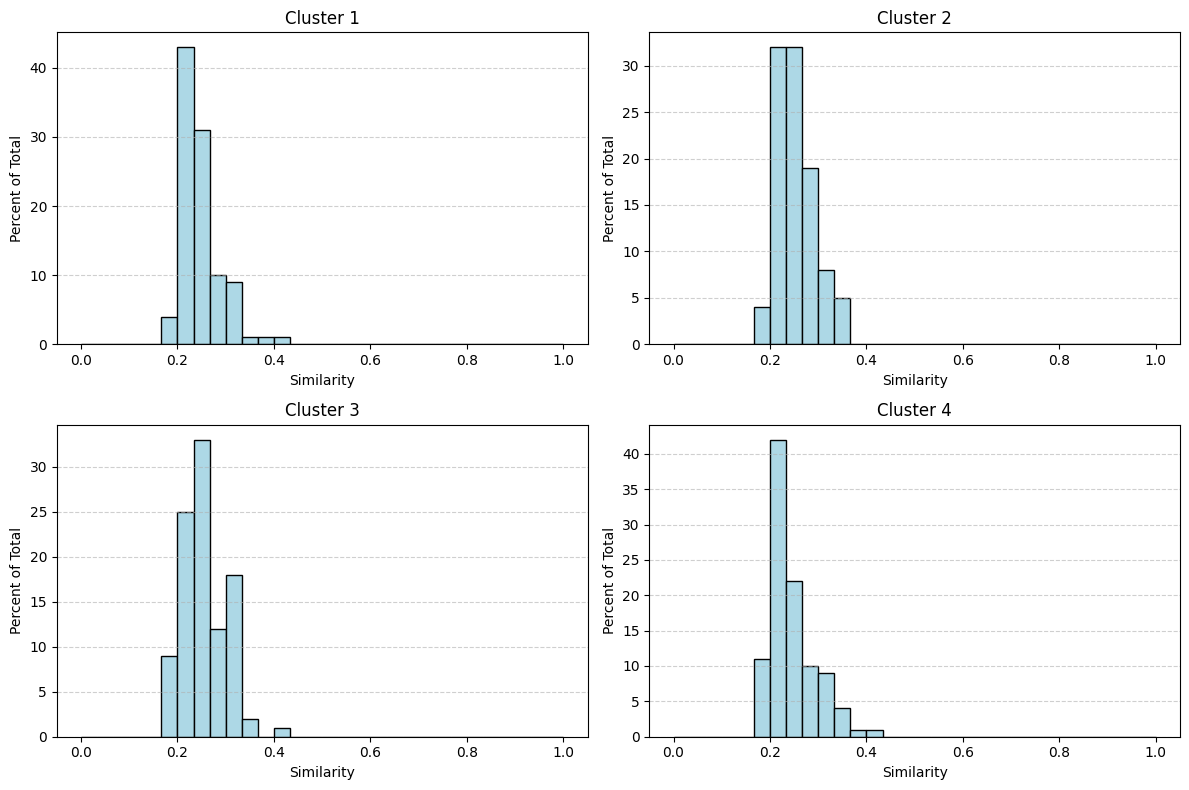

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize


kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)


distances = kmeans.transform(MD_x)

inv_distances = 1 / (distances + 1e-10)
pseudo_probs = normalize(inv_distances, norm='l1', axis=1)


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    axes[i].hist(pseudo_probs[:, i], bins=30, range=(0, 1),
                 color='lightblue', edgecolor='black')
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Percent of Total')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


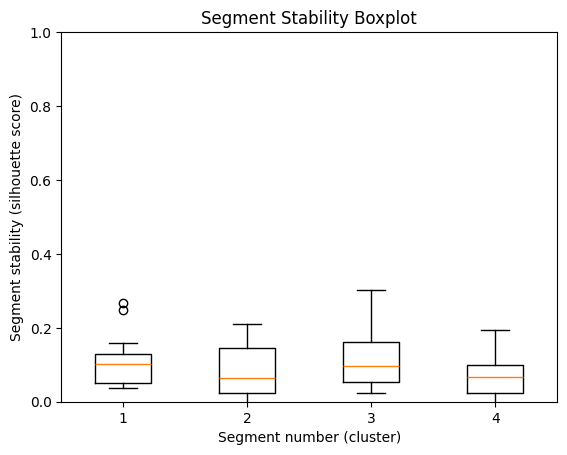

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples


k = 4


kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(MD_x)


silhouette_vals = silhouette_samples(MD_x, labels)


silhouette_per_cluster = [silhouette_vals[labels == i] for i in range(k)]


plt.boxplot(silhouette_per_cluster)
plt.ylim(0, 1)
plt.xlabel('Segment number ')
plt.ylabel('Segment stability ')
plt.title('Segment Stability Boxplot')
plt.show()


Profiling Segments

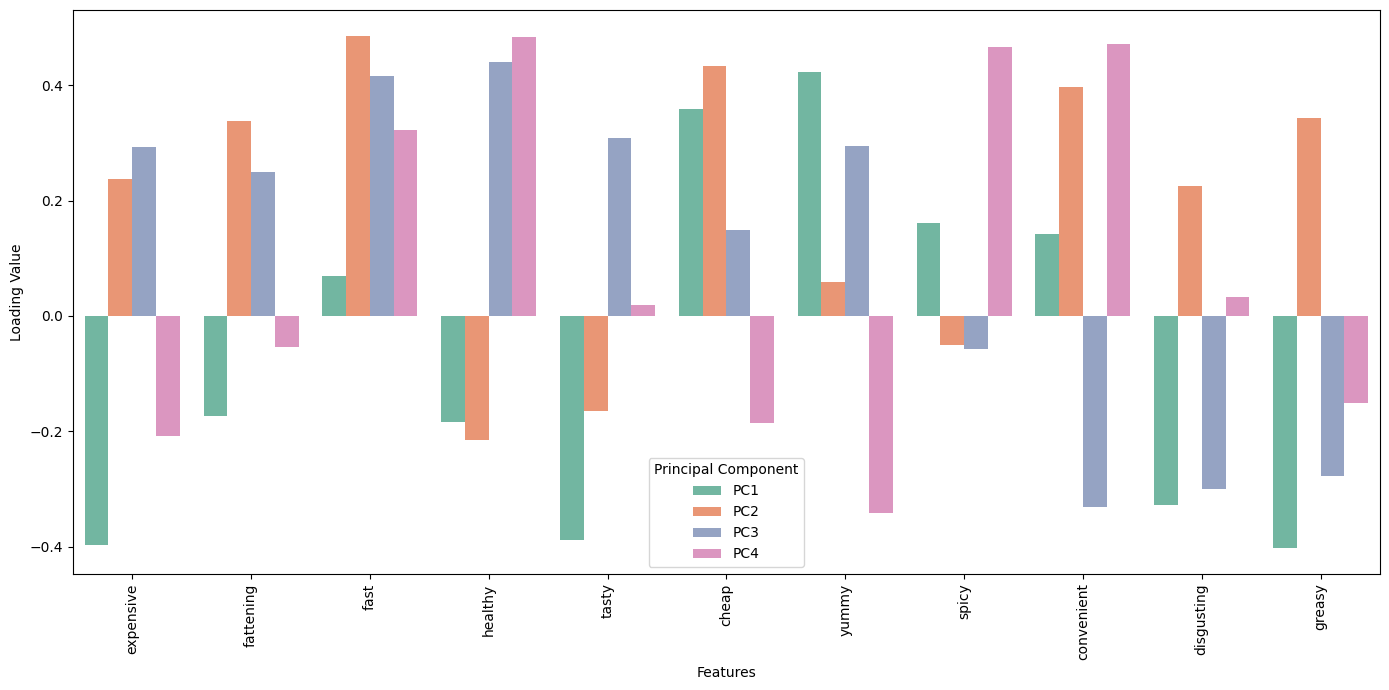

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import pandas as pd

# Assume you have:
# components = pca.components_.T  # shape: (n_features, n_components)
# feature_names = MD_x.columns

# Create a DataFrame for the first 4 component loadings
loading_df = pd.DataFrame(components[:, :4], columns=[f"PC{i+1}" for i in range(4)])
loading_df['Feature'] = feature_names

# Cluster the features (rows)
Z = linkage(pdist(loading_df.iloc[:, :-1]), method='ward')  # no Feature column
dendro = dendrogram(Z, no_plot=True)
order = dendro['leaves'][::-1]  # reverse order

# Reorder dataframe based on clustering
loading_df = loading_df.iloc[order]
loading_df['Feature'] = loading_df['Feature'].values  # preserve name order

# Melt the DataFrame for seaborn
loading_melted = loading_df.melt(id_vars='Feature', var_name='Component', value_name='Loading')

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=loading_melted, x='Feature', y='Loading', hue='Component', palette='Set2')
plt.xticks(rotation=90)

plt.xlabel("Features")
plt.ylabel("Loading Value")
plt.legend(title="Principal Component")
plt.tight_layout()
plt.show()


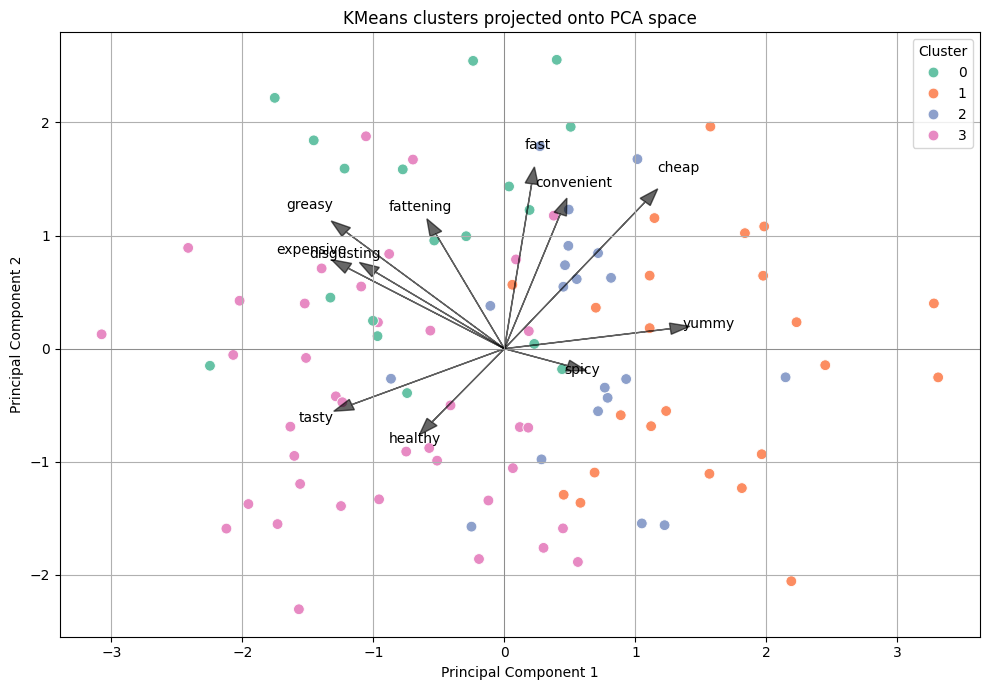

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np




scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)


pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)


kmeans = KMeans(n_clusters=4, random_state=42)
MD_k4 = kmeans.fit_predict(MD_x_scaled)

pca_df = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = MD_k4


plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans clusters projected onto PCA space')


loadings = pca.components_.T
feature_names = MD_x.columns

for i, feature in enumerate(feature_names):
    plt.arrow(0, 0,
              loadings[i, 0]*3, loadings[i, 1]*3,  # scale arrows
              color='black', alpha=0.6, head_width=0.1)
    plt.text(loadings[i, 0]*3.7, loadings[i, 1]*3.7,
             feature, color='black', ha='center', va='center')

plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.tight_layout()
plt.show()


Describing Segments

<ipython-input-74-f3e929ad6dab>:58: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



<Figure size 1600x1000 with 0 Axes>

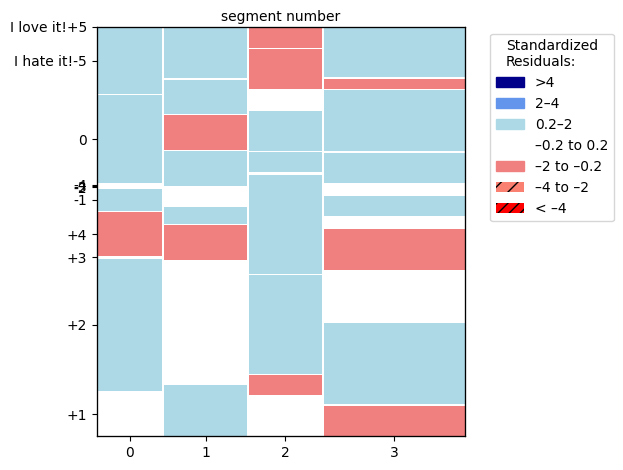

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches


contingency_table = pd.crosstab(pca_df['Cluster'], data['Like'])


chi2, p, dof, expected = chi2_contingency(contingency_table)
residuals = (contingency_table - expected) / np.sqrt(expected)


residuals_dict = {}
observed_dict = {}
for cluster in contingency_table.index:
    for like in contingency_table.columns:
        key = (str(cluster), str(like))
        residuals_dict[key] = residuals.loc[cluster, like]
        observed_dict[key] = contingency_table.loc[cluster, like]


def residual_properties(key):
    val = residuals_dict[key]

    if val > 4:
        return {'facecolor': 'darkblue'}
    elif val > 2:
        return {'facecolor': 'cornflowerblue'}
    elif val > 0.2:
        return {'facecolor': 'lightblue'}
    elif val < -4:
        return {'facecolor': 'red', 'hatch': '///'}
    elif val < -2:
        return {'facecolor': 'salmon', 'hatch': '//'}
    elif val < -0.2:
        return {'facecolor': 'lightcoral'}
    else:
        return {'facecolor': 'white'}


plt.figure(figsize=(16, 10))
mosaic(observed_dict,
       title='',
       labelizer=lambda k: '',
       properties=residual_properties)

plt.xlabel("segment number")
plt.ylabel("")


legend_patches = [
    mpatches.Patch(color='darkblue', label='>4'),
    mpatches.Patch(color='cornflowerblue', label='2–4'),
    mpatches.Patch(color='lightblue', label='0.2–2'),
    mpatches.Patch(color='white', label='–0.2 to 0.2', edgecolor='black'),
    mpatches.Patch(color='lightcoral', label='–2 to –0.2'),
    mpatches.Patch(facecolor='salmon', hatch='//', label='–4 to –2'),
    mpatches.Patch(facecolor='red', hatch='///', label='< –4')
]

plt.legend(handles=legend_patches, title="Standardized\nResiduals:", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-73-847fc044ec6e>:51: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



<Figure size 1000x600 with 0 Axes>

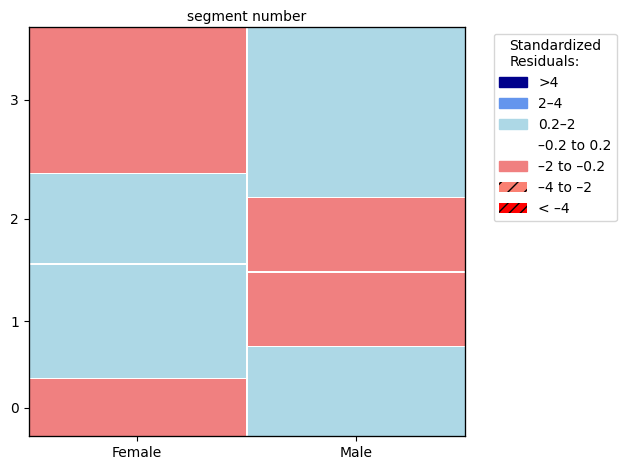

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches

contingency_table = pd.crosstab(data['Gender'], pca_df['Cluster'])
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
residuals = (contingency_table - expected) / np.sqrt(expected)

# Dictionaries for mosaic
residuals_dict = {}
observed_dict = {}
for row in contingency_table.index:
    for col in contingency_table.columns:
        key = (str(row), str(col))
        residuals_dict[key] = residuals.loc[row, col]
        observed_dict[key] = contingency_table.loc[row, col]

# Coloring function with discrete bins
def residual_properties(key):
    val = residuals_dict[key]
    if val > 4:
        return {'facecolor': 'darkblue'}
    elif val > 2:
        return {'facecolor': 'cornflowerblue'}
    elif val > 0.2:
        return {'facecolor': 'lightblue'}
    elif val < -4:
        return {'facecolor': 'red', 'hatch': '///'}
    elif val < -2:
        return {'facecolor': 'salmon', 'hatch': '//'}
    elif val < -0.2:
        return {'facecolor': 'lightcoral'}
    else:
        return {'facecolor': 'white'}

# Plot
plt.figure(figsize=(10, 6))
mosaic(observed_dict, title='', labelizer=lambda k: '', properties=residual_properties)
plt.xlabel("segment number")
plt.ylabel("gender")

# Legend
legend_patches = [
    mpatches.Patch(color='darkblue', label='>4'),
    mpatches.Patch(color='cornflowerblue', label='2–4'),
    mpatches.Patch(color='lightblue', label='0.2–2'),
    mpatches.Patch(color='white', edgecolor='black', label='–0.2 to 0.2'),
    mpatches.Patch(color='lightcoral', label='–2 to –0.2'),
    mpatches.Patch(facecolor='salmon', hatch='//', label='–4 to –2'),
    mpatches.Patch(facecolor='red', hatch='///', label='< –4')
]
plt.legend(handles=legend_patches, title='Standardized\nResiduals:', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


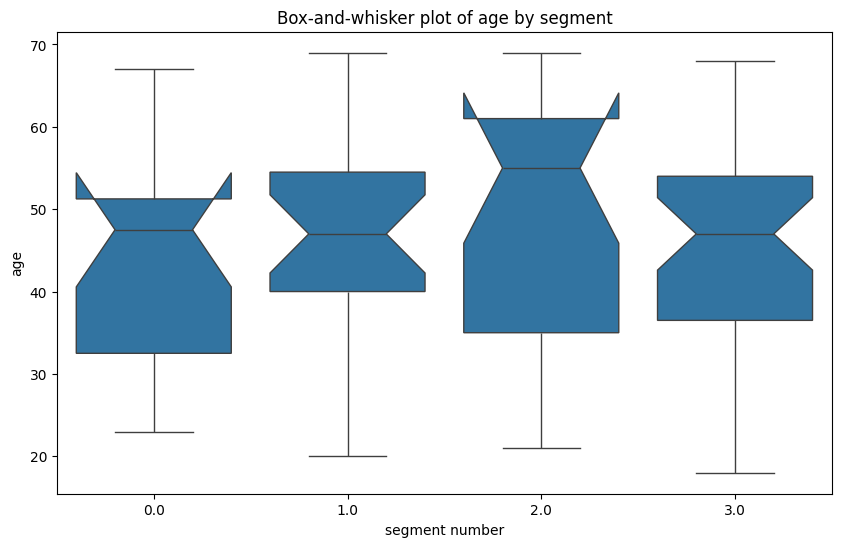

In [72]:
import seaborn as sns

# Assume you have a DataFrame:
# data = pd.DataFrame({'cluster': clusters, 'age': age})

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=pca_df['Cluster'], y=data['Age'], notch=True)
plt.xlabel("segment number")
plt.ylabel("age")
plt.title("Box-and-whisker plot of age by segment")
plt.show()
